# Left Join

1) Left Join

2) Right Join

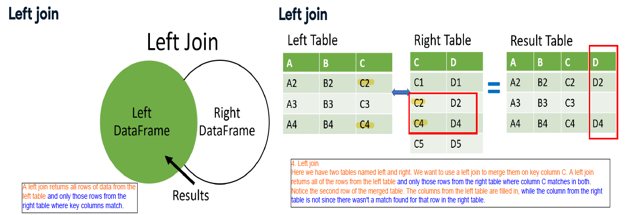

In [1]:
import pandas as pd

movies = pd.read_pickle('./Data/movies.p')
print(movies.head())

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17


In [2]:
taglines = pd.read_pickle('./Data/taglines.p')
print(taglines.head())

       id                                         tagline
0   19995                     Enter the World of Pandora.
1     285  At the end of the world, the adventure begins.
2  206647                           A Plan No One Escapes
3   49026                                 The Legend Ends
4   49529            Lost in our world, found in another.


In [4]:
movies_taglines = movies.merge(taglines, on = 'id', how = 'left')
print(movies_taglines.head())
print(movies_taglines.shape)

      id                 title  popularity release_date  \
0    257          Oliver Twist   20.415572   2005-09-23   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12   
2  38365             Grown Ups   38.864027   2010-06-24   
3   9672              Infamous    3.680896   2006-11-16   
4  12819       Alpha and Omega   12.300789   2010-09-17   

                                           tagline  
0                                              NaN  
1             Never underestimate an overachiever.  
2  Boys will be boys. . . some longer than others.  
3          There's more to the story than you know  
4                           A Pawsome 3D Adventure  
(4803, 5)


#### Note: The default value for how is 'inner', so we didn't need to specify this in Chapter 1 since we were only working with inner joins. 

### Right join

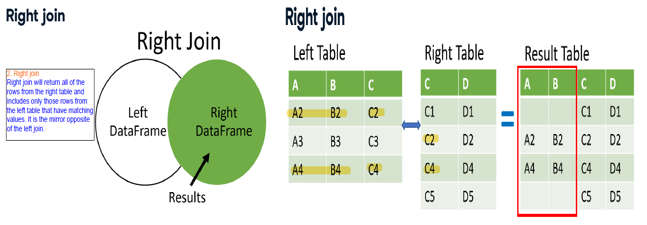

In [7]:
movie_to_genres = pd.read_pickle('./Data/movie_to_genres.p')
tv_genre = movie_to_genres[movie_to_genres['genre'] == 'Comedy']
print(tv_genre)

       movie_id   genre
1             5  Comedy
7            13  Comedy
35           35  Comedy
54           68  Comedy
61           71  Comedy
...         ...     ...
12115    376659  Comedy
12116    378200  Comedy
12129    385636  Comedy
12133    386826  Comedy
12153    426469  Comedy

[1722 rows x 2 columns]


In [9]:
m = movie_to_genres['genre'] == 'Comedy'
tv_genre = movie_to_genres[m]
print(tv_genre)

       movie_id   genre
1             5  Comedy
7            13  Comedy
35           35  Comedy
54           68  Comedy
61           71  Comedy
...         ...     ...
12115    376659  Comedy
12116    378200  Comedy
12129    385636  Comedy
12133    386826  Comedy
12153    426469  Comedy

[1722 rows x 2 columns]


In [12]:
tv_movies = movies.merge(tv_genre, how = 'right',
                        left_on = 'id', right_on = 'movie_id')

print(tv_movies.head())

   id               title  popularity release_date  movie_id   genre
0   5          Four Rooms   22.876230   1995-12-09         5  Comedy
1  13        Forrest Gump  138.133331   1994-07-06        13  Comedy
2  35  The Simpsons Movie   46.875375   2007-07-25        35  Comedy
3  68              Brazil   41.089863   1985-02-20        68  Comedy
4  71        Billy Elliot   20.428237   2000-05-18        71  Comedy


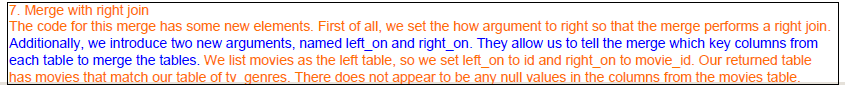

### Outer join

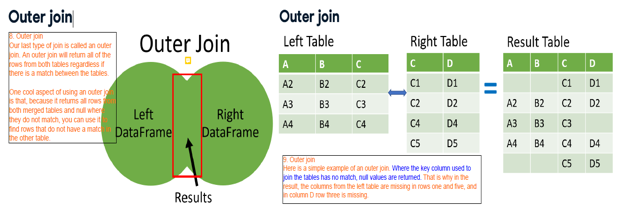

In [14]:
fam = movie_to_genres['genre'] == 'Family'
family = movie_to_genres[fam].head(3)
print(family)

     movie_id   genre
5          12  Family
33         35  Family
111       105  Family


In [15]:
com = movie_to_genres['genre'] == 'Comedy'
comedy = movie_to_genres[com].head(3)
print(comedy)

    movie_id   genre
1          5  Comedy
7         13  Comedy
35        35  Comedy


In [16]:
family_comedy = family.merge(comedy, on = 'movie_id', how = 'outer',
                            suffixes = ('_fam', '_com'))

print(family_comedy)

   movie_id genre_fam genre_com
0        12    Family       NaN
1        35    Family    Comedy
2       105    Family       NaN
3         5       NaN    Comedy
4        13       NaN    Comedy


In [ ]:
# In our original comedy tables ID number 12 does not exist. Therefore a 
# null is shown.

### Merging a table to itself

In [17]:
import pandas as pd

sequel =  pd.read_pickle('./Data/sequels.p')
print(sequel.head())

      id         title  sequel
0  19995        Avatar    <NA>
1    862     Toy Story     863
2    863   Toy Story 2   10193
3    597       Titanic    <NA>
4  24428  The Avengers    <NA>


In [18]:
original_sequels = sequel.merge(sequel, left_on = 'sequel', right_on = 'id',
                               suffixes = ('_org', '_seq'))
print(original_sequels.head())

   id_org                                          title_org  sequel_org  \
0     862                                          Toy Story         863   
1     863                                        Toy Story 2       10193   
2     675          Harry Potter and the Order of the Phoenix         767   
3     121              The Lord of the Rings: The Two Towers         122   
4     120  The Lord of the Rings: The Fellowship of the Ring         121   

   id_seq                                      title_seq  sequel_seq  
0     863                                    Toy Story 2       10193  
1   10193                                    Toy Story 3        <NA>  
2     767         Harry Potter and the Half-Blood Prince        <NA>  
3     122  The Lord of the Rings: The Return of the King        <NA>  
4     121          The Lord of the Rings: The Two Towers         122  


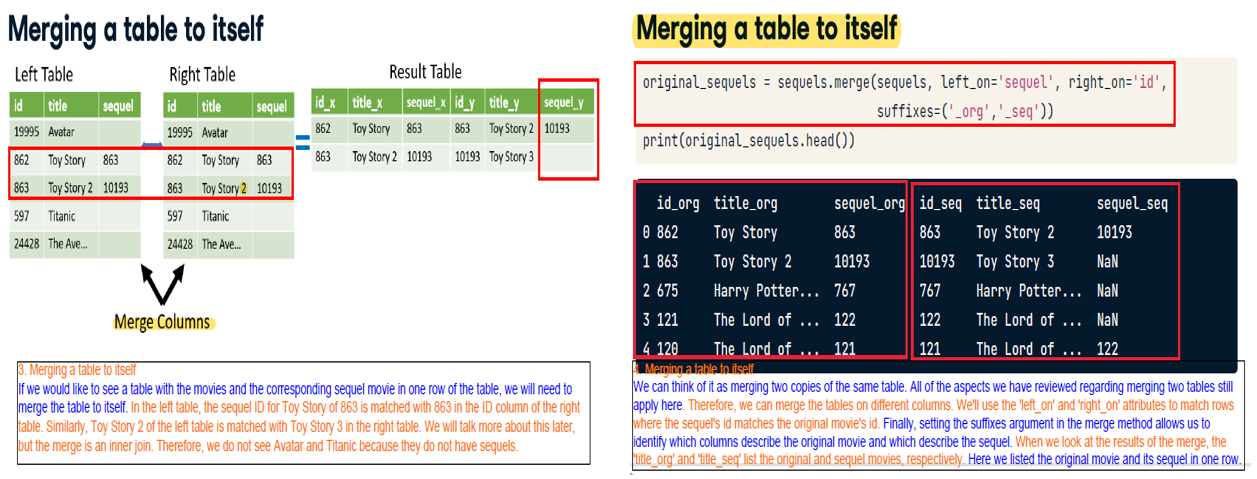

In [22]:
print(original_sequels[['title_org', 'title_seq']].head())

                                           title_org  \
0                                          Toy Story   
1                                        Toy Story 2   
2          Harry Potter and the Order of the Phoenix   
3              The Lord of the Rings: The Two Towers   
4  The Lord of the Rings: The Fellowship of the Ring   

                                       title_seq  
0                                    Toy Story 2  
1                                    Toy Story 3  
2         Harry Potter and the Half-Blood Prince  
3  The Lord of the Rings: The Return of the King  
4          The Lord of the Rings: The Two Towers  


### Merging a table to itself with left join

In [25]:
original_sequels = sequel.merge(sequel, left_on = 'sequel', right_on = 'id', 
                               how = 'left', suffixes = ('_org', '_seq'))
print(original_sequels.head())

   id_org     title_org  sequel_org  id_seq    title_seq  sequel_seq
0   19995        Avatar        <NA>    <NA>          NaN        <NA>
1     862     Toy Story         863     863  Toy Story 2       10193
2     863   Toy Story 2       10193   10193  Toy Story 3        <NA>
3     597       Titanic        <NA>    <NA>          NaN        <NA>
4   24428  The Avengers        <NA>    <NA>          NaN        <NA>


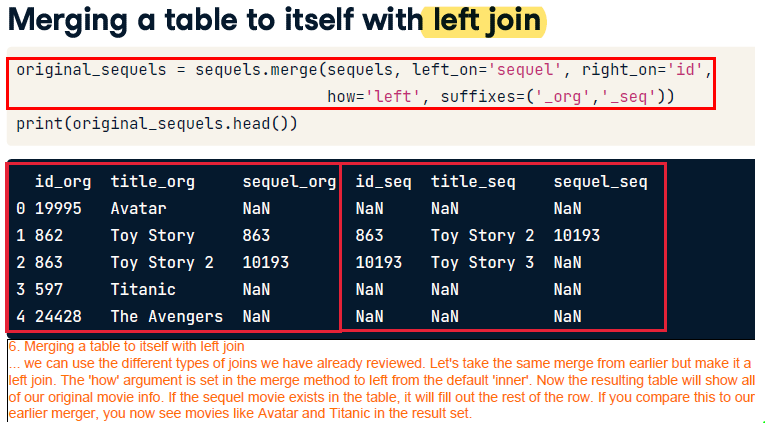

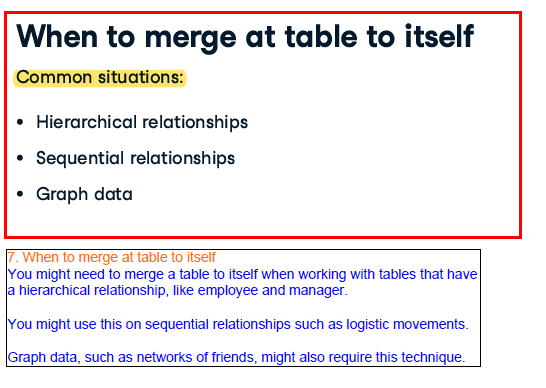

### Merging on indexes

In [2]:
import pandas as pd
movies = pd.read_pickle('./Data/movies.p')
print(movies.head())

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17


In [31]:
movies_taglines = movies.merge(taglines, on='id', how='left')
print(movies_taglines.head())

      id                 title  popularity release_date  \
0    257          Oliver Twist   20.415572   2005-09-23   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12   
2  38365             Grown Ups   38.864027   2010-06-24   
3   9672              Infamous    3.680896   2006-11-16   
4  12819       Alpha and Omega   12.300789   2010-09-17   

                                           tagline  
0                                              NaN  
1             Never underestimate an overachiever.  
2  Boys will be boys. . . some longer than others.  
3          There's more to the story than you know  
4                           A Pawsome 3D Adventure  


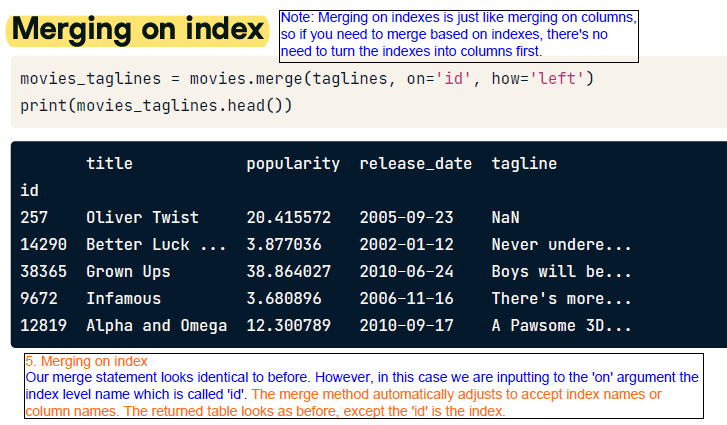

### MultiIndex datasets

In [ ]:
## We are missing samuel.csv file

In [4]:
casts = pd.read_pickle('./Data/casts.p')
print(casts.head())

    movie_id  cast_id character  gender    id               name
7          5       22   Jezebel       1  3122        Sammi Davis
8          5       23     Diana       1  3123  Amanda de Cadenet
9          5       24    Athena       1  3124     Valeria Golino
3          5       25   Elspeth       1  3125            Madonna
12         5       26       Eva       1  3126          Ione Skye
